# Comparative Analysis between Tensorflow and PyTorch

Both Tensorflow and PyTorch are open source Python libraries that use graphs to perform numerical computation on data. Both are used extensively in academic research and commercial code. Both are extended by a variety of APIs, cloud computing platforms, and model repositories.

# Function to plot Result Graphs

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(loss_history, exp_history):
    fig = plt.figure(figsize=(10, 7))
    fig.add_axes()

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    for ax in [ax1, ax2]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='2')
        
    ax1.set_title('RMSE Loss')
    ax2.set_title('exp')
    ax1.plot(np.arange(len(loss_history)), loss_history)
    ax2.plot(np.arange(len(exp_history)), exp_history)
    

# Tensorflow

TensorFlow was developed by Google and released as open source in 2015. It grew out of Google’s homegrown machine learning software, which was refactored and optimized for use in production.

TensorFlow is a framework composed of two core building blocks:
1. A library for defining computational graphs and runtime for executing such graphs on a variety of different hardware.
2. A computational graph which has many advantages (but more on that in just a moment).

The name “TensorFlow” describes how you organize and perform operations on data. The basic data structure for both TensorFlow and PyTorch is a tensor. When you use TensorFlow, you perform operations on the data in these tensors by building a stateful dataflow graph, kind of like a flowchart that remembers past events.

In TensorFlow 2.0, it’s easier to use eager execution, which is the way Python normally works. Eager execution evaluates operations immediately, so we can write your code using Python control flow rather than graph control flow.

TensorFlow has a large and well-established user base and a plethora of tools to help productionize machine learning. For mobile development, it has APIs for JavaScript and Swift, and TensorFlow Lite lets you compress and optimize models for Internet of Things devices.

In [37]:
import tensorflow.compat.v1 as tf
import numpy as np

In [23]:
sess = tf.compat.v1.InteractiveSession()

x = [[2., 4., 6.]]
y = [[1.], [3.], [5.]]
m = tf.math.multiply(x, y)

print(m.eval())

sess.close()

[[ 2.  4.  6.]
 [ 6. 12. 18.]
 [10. 20. 30.]]


Using Tensorflow, I have created a simple SGD approximator for $f(x) = x^{exp}$, where $exp$ is a model parameter.

In [38]:
def rmse(y, y_hat):
    """Compute root mean squared error"""
    return tf.sqrt(tf.reduce_mean(tf.square((y - y_hat))))

def forward(x, e):
    """Forward pass for our function"""
    # tensorflow has automatic broadcasting 
    # so we do not need to reshape e manually
    return tf.pow(x, e) 

n = 100 # number of examples
learning_rate = 5e-6

# Placeholders for data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model parameters
exp = tf.constant(2.0)
exp_hat = tf.Variable(4.0, name='exp_hat')

# Model definition
y_hat = forward(x, exp_hat)

# Optimizer
loss = rmse(y, y_hat)
opt = tf.train.GradientDescentOptimizer(learning_rate)

# We will run this operation to perform a single training step,
# e.g. opt.step() in Pytorch.
# Execution of this operation will also update model parameters
train_op = opt.minimize(loss) 

# Let's generate some training data
x_train = np.random.rand(n) + 10
y_train = x_train ** 2

loss_history = []
exp_history = []

# First, we need to create a Tensorflow session object
with tf.Session() as sess:
    
    # Initialize all defined variables
    tf.global_variables_initializer().run()
    
    # Training loop
    for i in range(0, 500):
        print("Iteration %d" % i)
        # Run a single trainig step
        curr_loss, curr_exp, _ = sess.run([loss, exp_hat, train_op], feed_dict={x: x_train, y: y_train})
        
        print("loss = %s" % curr_loss)
        print("exp = %s" % curr_exp)
        
        # Do some recordings for plots
        loss_history.append(curr_loss)
        exp_history.append(curr_exp)

Iteration 0
loss = 12326.794
exp = 4.0
Iteration 1
loss = 8684.806
exp = 3.85321
Iteration 2
loss = 6773.711
exp = 3.7494123
Iteration 3
loss = 5572.578
exp = 3.6681724
Iteration 4
loss = 4740.6675
exp = 3.6011093
Iteration 5
loss = 4127.623
exp = 3.5438645
Iteration 6
loss = 3655.8213
exp = 3.4938548
Iteration 7
loss = 3280.8193
exp = 3.449413
Iteration 8
loss = 2975.2156
exp = 3.4093966
Iteration 9
loss = 2721.1484
exp = 3.3729866
Iteration 10
loss = 2506.452
exp = 3.3395746
Iteration 11
loss = 2322.5361
exp = 3.308696
Iteration 12
loss = 2163.161
exp = 3.2799876
Iteration 13
loss = 2023.6761
exp = 3.2531598
Iteration 14
loss = 1900.5443
exp = 3.2279778
Iteration 15
loss = 1791.0237
exp = 3.2042484
Iteration 16
loss = 1692.9583
exp = 3.1818113
Iteration 17
loss = 1604.6267
exp = 3.1605313
Iteration 18
loss = 1524.6383
exp = 3.1402936
Iteration 19
loss = 1451.8561
exp = 3.1209996
Iteration 20
loss = 1385.341
exp = 3.1025643
Iteration 21
loss = 1324.312
exp = 3.0849137
Iteration 22
los

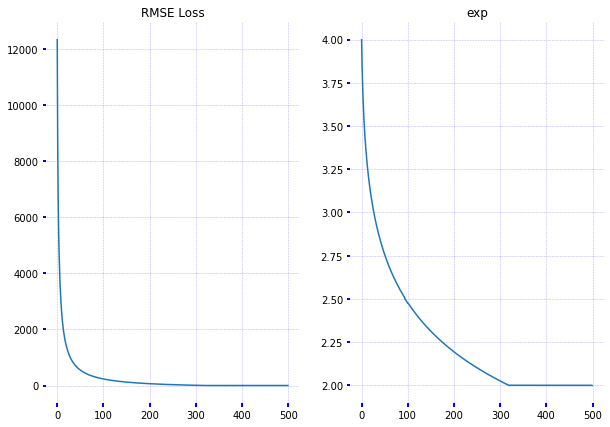

In [42]:
plot_results(loss_history, exp_history)

# PyTorch

PyTorch is based on Torch, a framework for doing fast computation that is written in C. Torch has a Lua wrapper for constructing models.

PyTorch has two core building  blocks: 
1. Imperative and dynamic building of computational graphs.
2. Autograds: Performs automatic differentiation of the dynamic graphs.


PyTorch wraps the same C back end in a Python interface. But it’s more than just a wrapper. Developers built it from the ground up to make models easy to write for Python programmers. The underlying, low-level C and C++ code is optimized for running Python code. Because of this tight integration, you get:
1. Better memory and optimization
2. More sensible error messages
3. Finer-grained control of model structure
4. More transparent model behavior
5. Better compatibility with NumPy

Converting NumPy objects to tensors is baked into PyTorch’s core data structures. That means we can easily switch back and forth between torch.Tensor objects and numpy.array objects.

PyTorch adds a C++ module for autodifferentiation to the Torch backend. Autodifferentiation automatically calculates the gradient of the functions defined in torch.nn during backpropagation.

By default, PyTorch uses eager mode computation. We can run a neural net as we build it, line by line, which makes it easier to debug. It also makes it possible to construct neural nets with conditional execution. This dynamic execution is more intuitive for most Python programmers.

In [13]:
import torch
import numpy as np

In [21]:
x = np.array([[2., 4., 6.]])
y = np.array([[1.], [3.], [5.]])

m = torch.mul(torch.from_numpy(x), torch.from_numpy(y))

m.numpy()

array([[ 2.,  4.,  6.],
       [ 6., 12., 18.],
       [10., 20., 30.]])

Using PyTorch, I have created a simple SGD approximator for $f(x) = x^{exp}$, where $exp$ is a model parameter.

In [45]:
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2).sum()))

def forward(x, e):
    """Forward pass for our function"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 100 # number of examples
learning_rate = 5e-6

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)

# Model parameter and it's true value
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)
y = forward(x, exp)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 200):
    print("Iteration %d" % i)
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.data)
    exp_history.append(y_hat.data[0])
    
    # Compute gradients
    loss.backward()
    
    print("loss = %s" % loss.data)
    print("exp = %s" % exp_hat.data[0])
    
    # Update model parameters
    exp_hat.data -= learning_rate * exp_hat.grad.data
    exp_hat.grad.data.zero_()

Iteration 0
loss = tensor(33004.1172)
exp = tensor(4.)
Iteration 1
loss = tensor(14600.9893)
exp = tensor(3.6341)
Iteration 2
loss = tensor(10089.6709)
exp = tensor(3.4702)
Iteration 3
loss = tensor(7771.6655)
exp = tensor(3.3557)
Iteration 4
loss = tensor(6328.0068)
exp = tensor(3.2666)
Iteration 5
loss = tensor(5333.0977)
exp = tensor(3.1933)
Iteration 6
loss = tensor(4602.1606)
exp = tensor(3.1307)
Iteration 7
loss = tensor(4040.7261)
exp = tensor(3.0762)
Iteration 8
loss = tensor(3595.0564)
exp = tensor(3.0277)
Iteration 9
loss = tensor(3232.1792)
exp = tensor(2.9841)
Iteration 10
loss = tensor(2930.6719)
exp = tensor(2.9444)
Iteration 11
loss = tensor(2675.9805)
exp = tensor(2.9080)
Iteration 12
loss = tensor(2457.8521)
exp = tensor(2.8744)
Iteration 13
loss = tensor(2268.8499)
exp = tensor(2.8432)
Iteration 14
loss = tensor(2103.4392)
exp = tensor(2.8139)
Iteration 15
loss = tensor(1957.4150)
exp = tensor(2.7865)
Iteration 16
loss = tensor(1827.5225)
exp = tensor(2.7607)
Iteratio

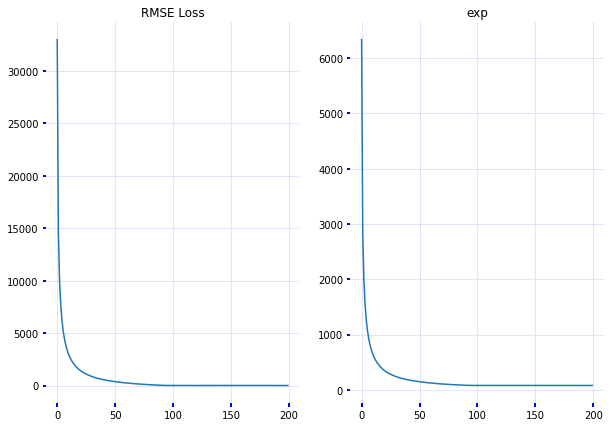

In [46]:
plot_results(loss_history, exp_history)